In [1]:
!pip3 install -U ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [3]:
diabetes = fetch_ucirepo(id=296)
print(f'Diabetes Data Fetched!')

Diabetes Data Fetched!


## Data Processing

In [4]:
df = diabetes.data.original.copy()

In [5]:
#Replace missing values in Dataset with values that make sense
na_cols = ['race', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
replace_cols = ['Other', 'Other', 'Other', 'Other', 'No Diagnosis 2', 'No Diagnosis 3', 'None', 'None']

for i in range(len(na_cols)):
    df.fillna({na_cols[i]: replace_cols[i]}, inplace = True)

# Replace values with bad formatting for better understanding
df.replace({'change': {'Ch': 'Yes'}}, inplace=True)
df.replace({'readmitted': {'NO': 'No'}}, inplace=True)

## Demographic Charts

### Histogram

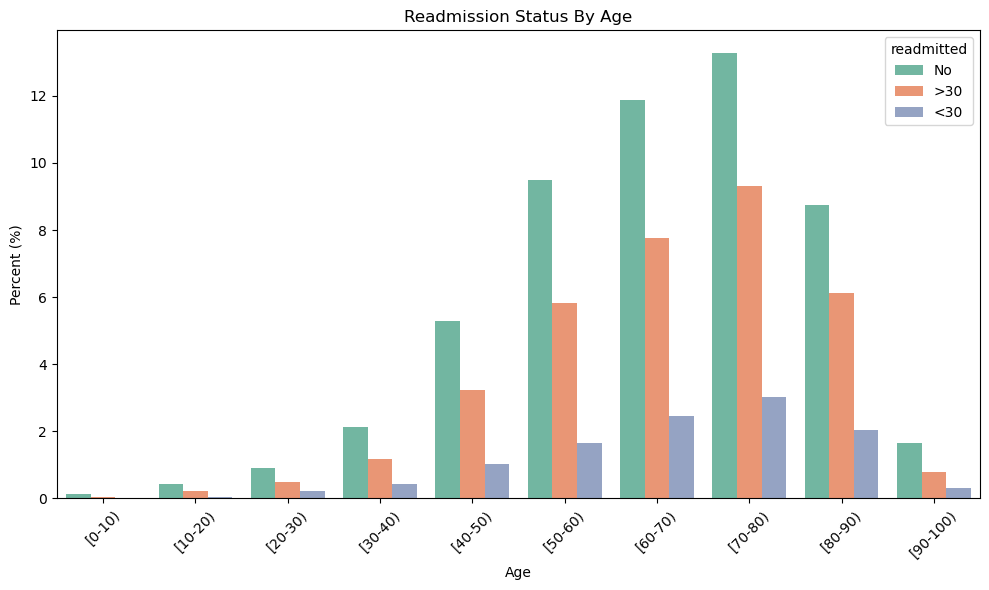

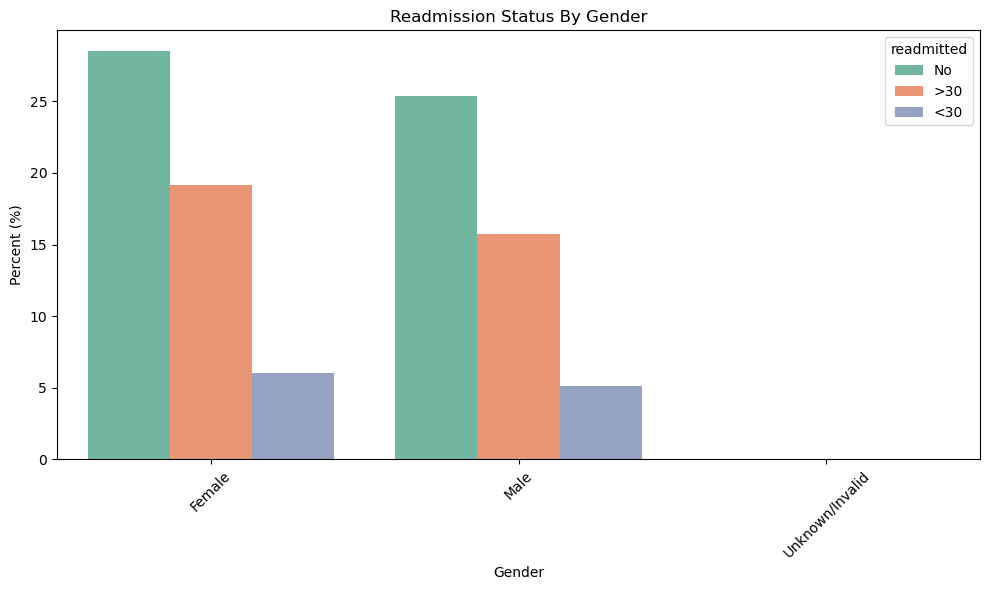

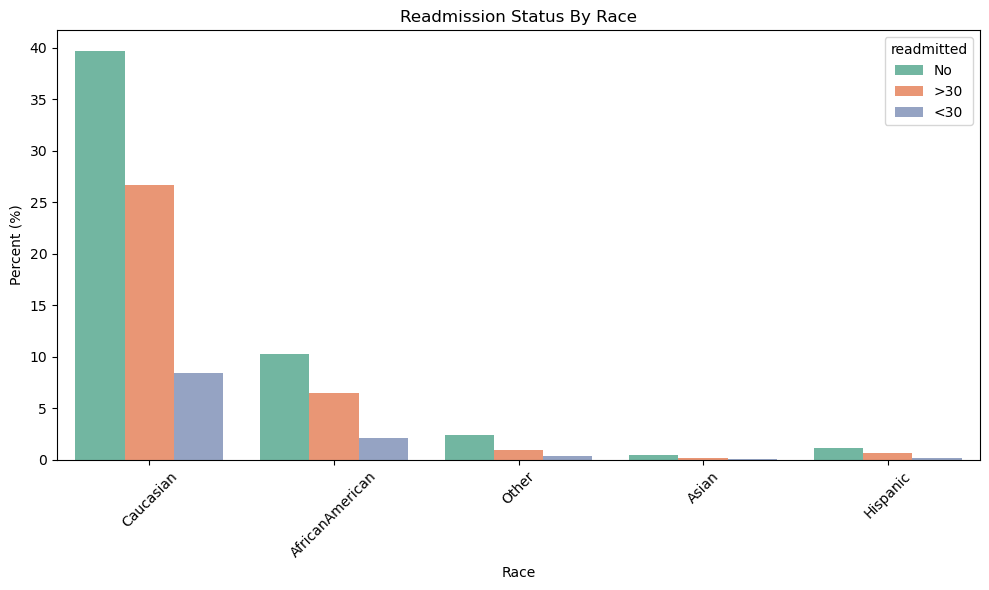

In [22]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  

demographics_cols = ['age', 'gender', 'race']
demographics_labels = ['Age', 'Gender', 'Race']

for i in range(len(demographics_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=demographics_cols[i], hue='readmitted', stat="percent", palette=colors)
    plt.xlabel(demographics_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {demographics_labels[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Stacked Bar Charts

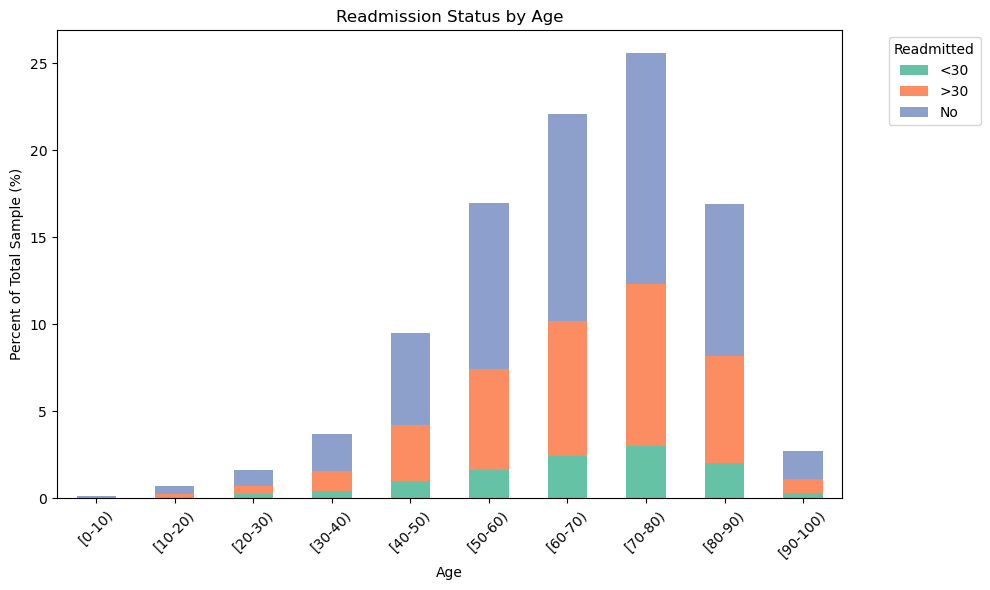

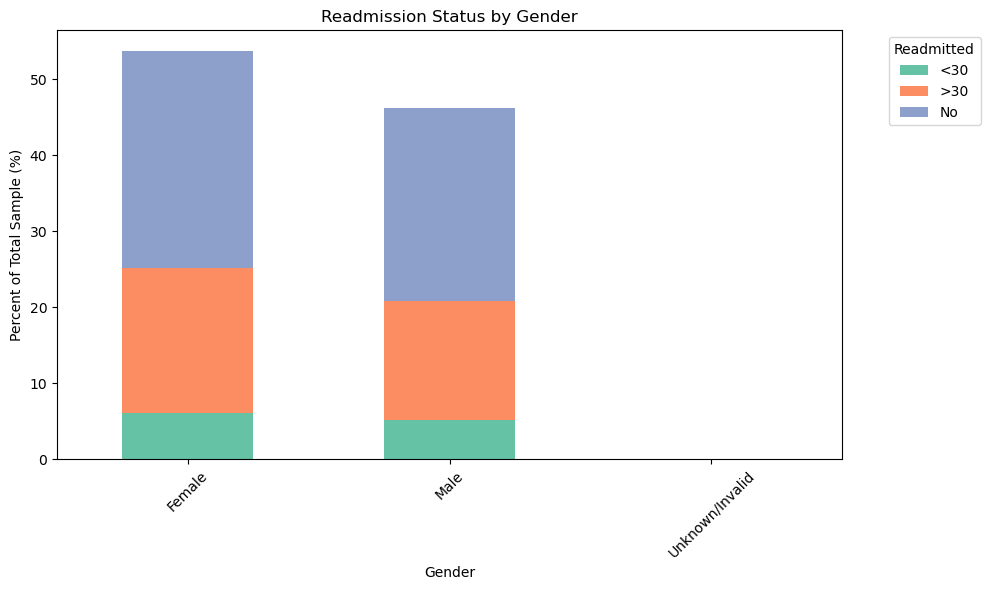

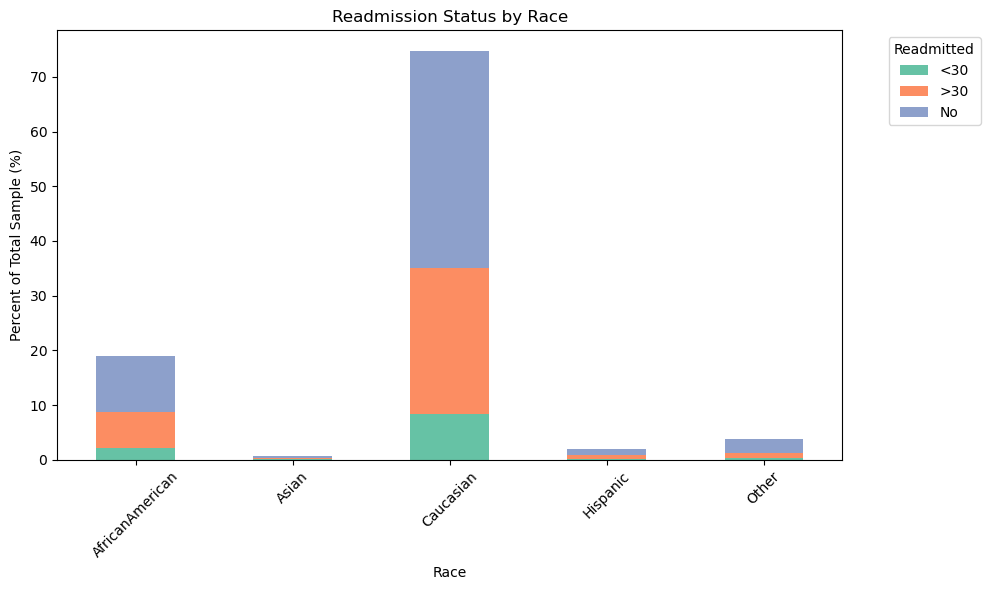

In [25]:
demographics_cols = ['age', 'gender', 'race']
demographics_labels = ['Age', 'Gender', 'Race']

colors = sns.color_palette("Set2")  # nice Seaborn colors

for i in range(len(demographics_cols)):
    # Crosstab (absolute counts)
    ct = pd.crosstab(df[demographics_cols[i]], df['readmitted'])

    # Convert to % of the total sample
    ct = (ct / ct.values.sum()) * 100

    # Plot stacked bar chart
    ct.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 6),
        color=colors[:len(ct.columns)]
    )

    plt.xlabel(demographics_labels[i])
    plt.ylabel("Percent of Total Sample (%)")
    plt.title(f"Readmission Status by {demographics_labels[i]}")
    plt.xticks(rotation=45)
    plt.legend(title="Readmitted", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



### Pie Charts

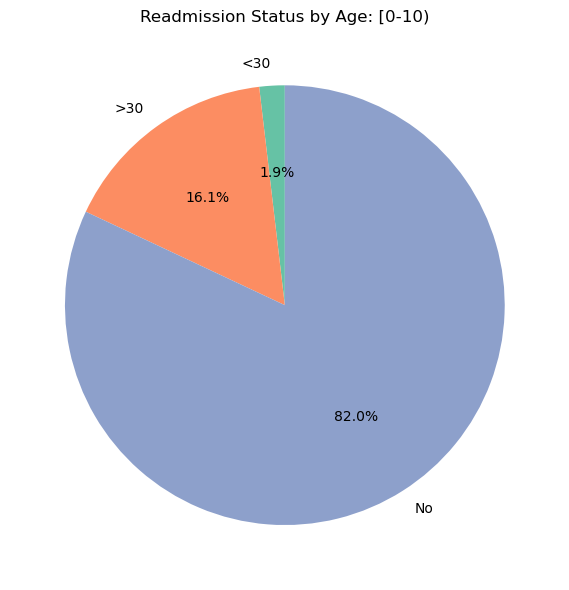

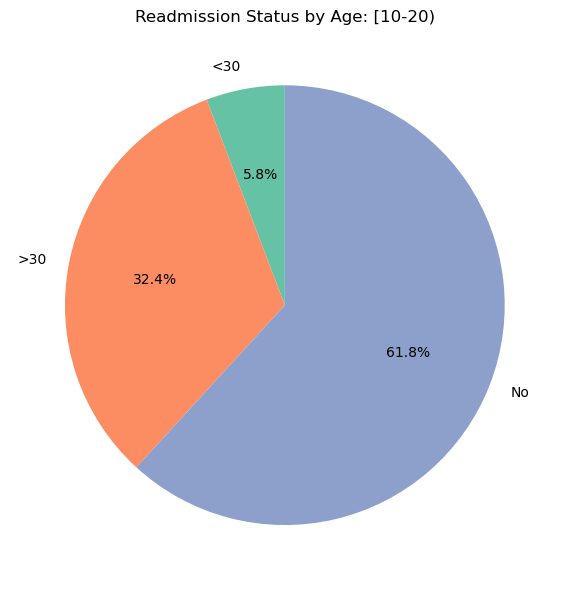

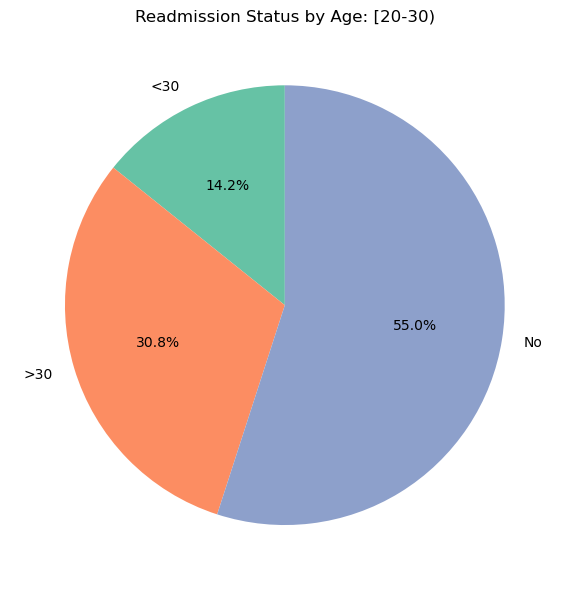

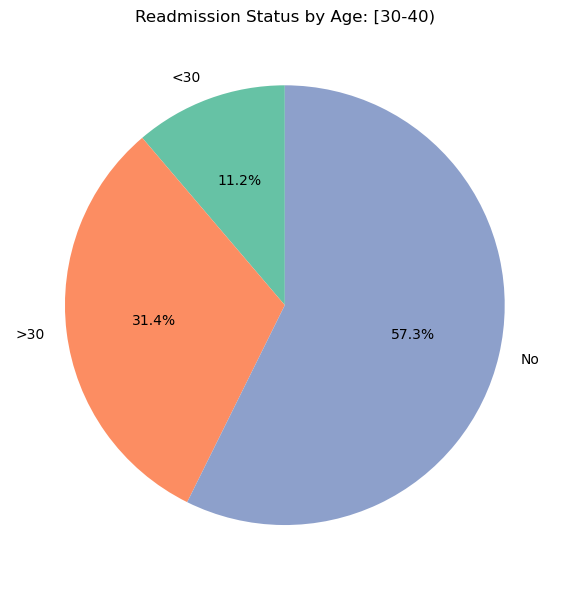

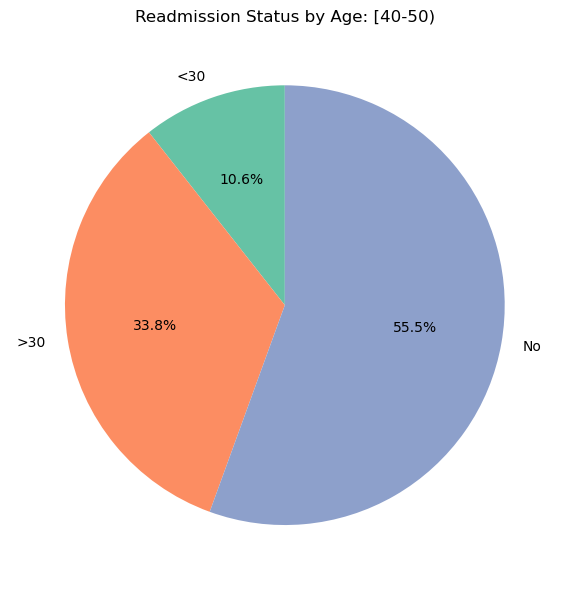

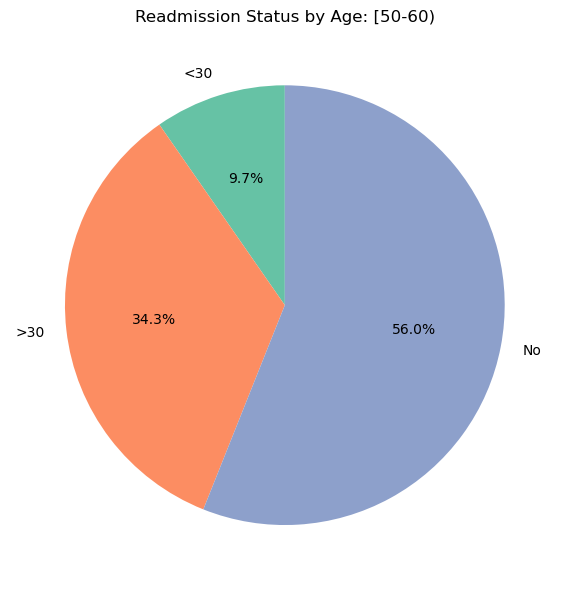

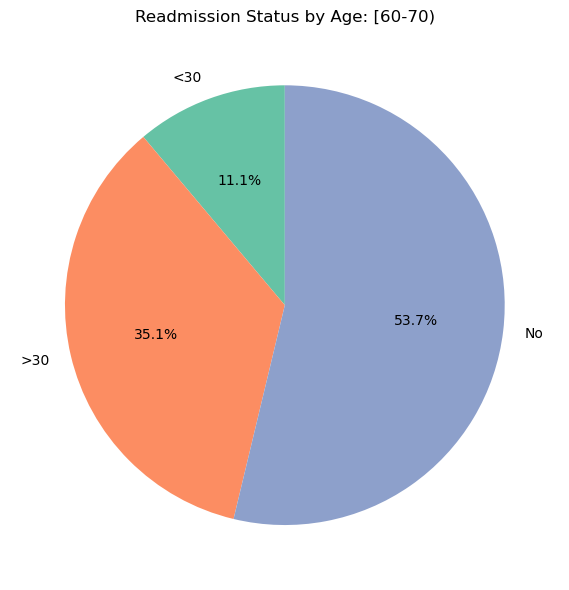

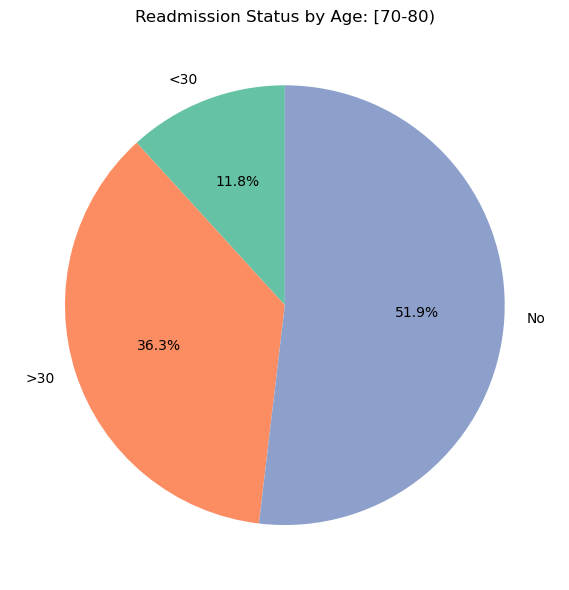

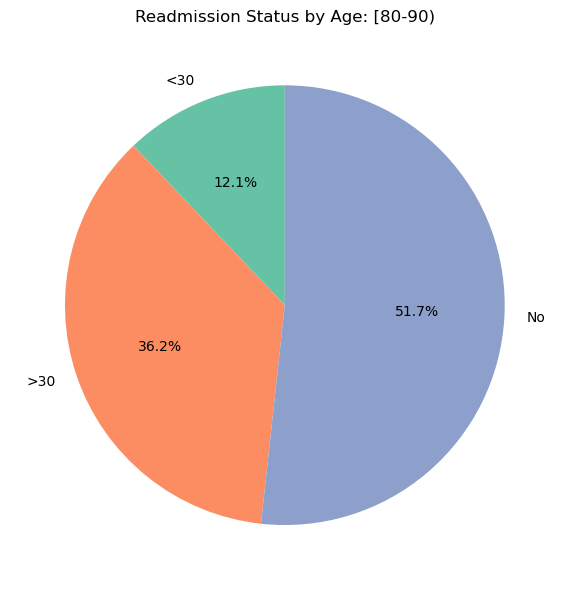

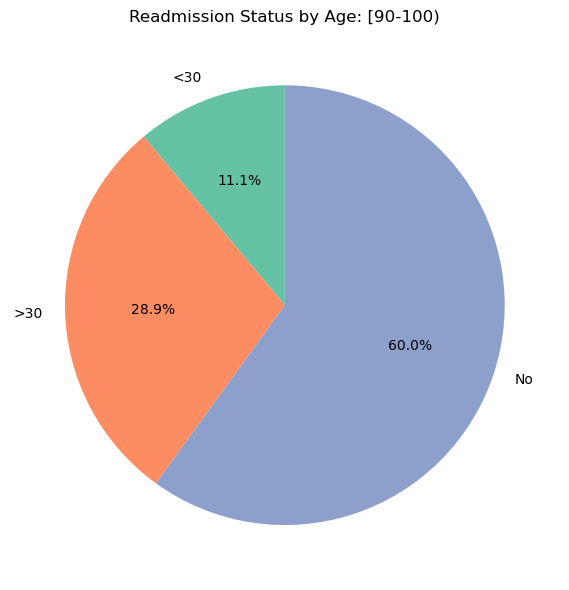

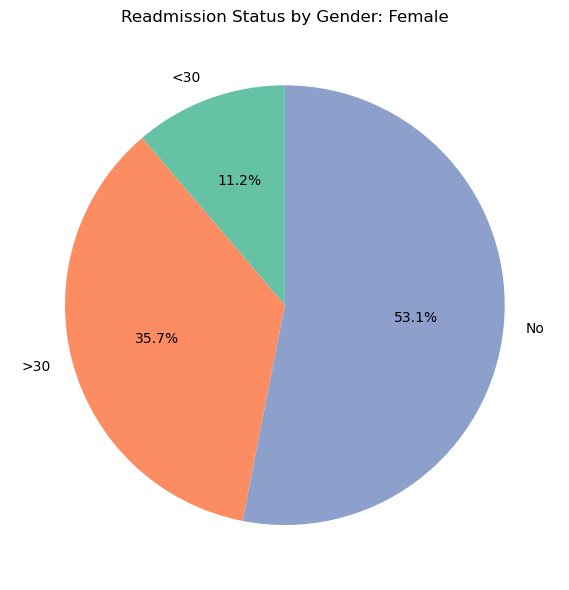

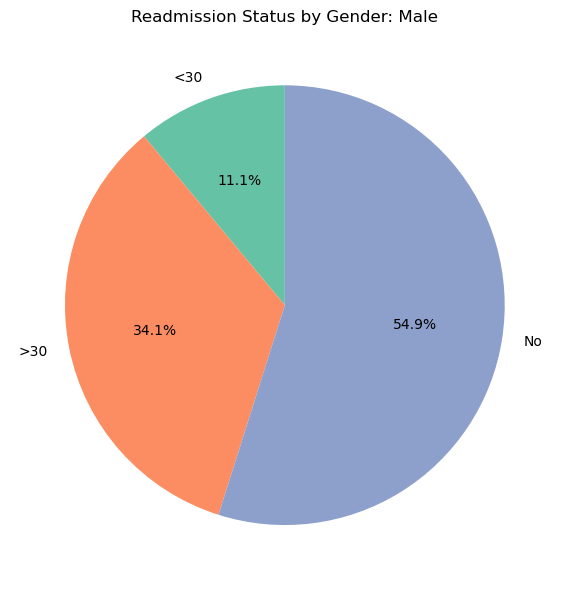

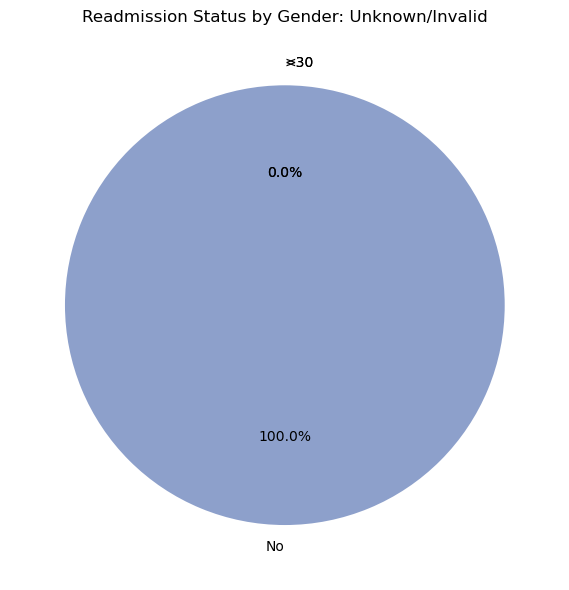

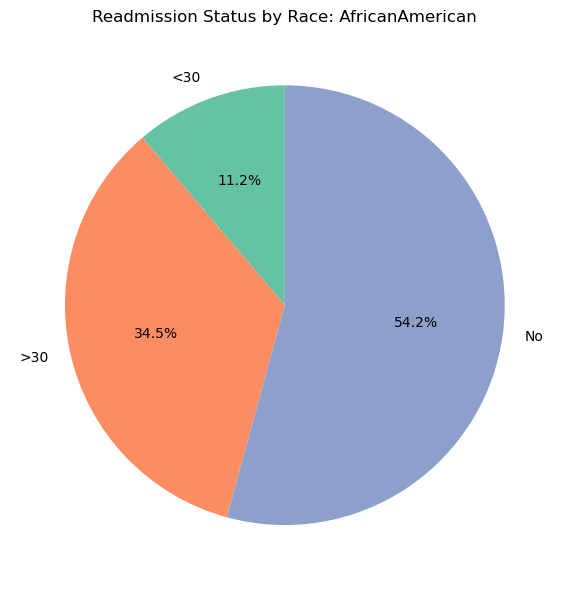

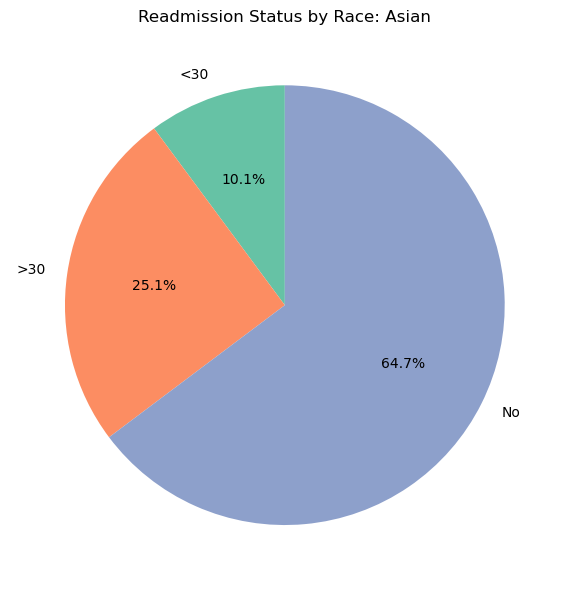

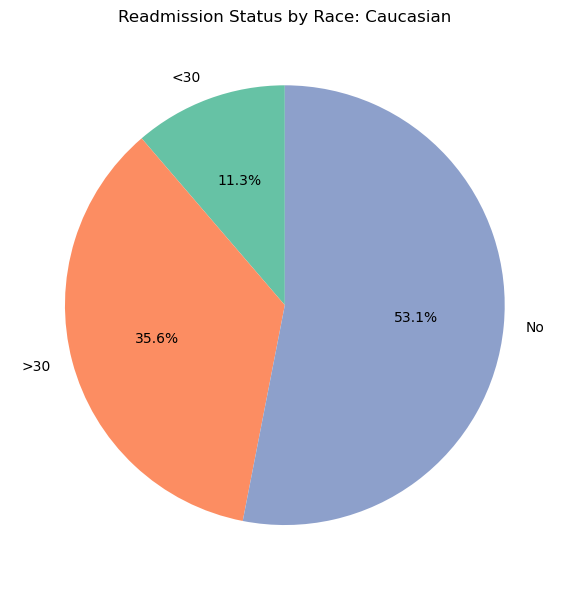

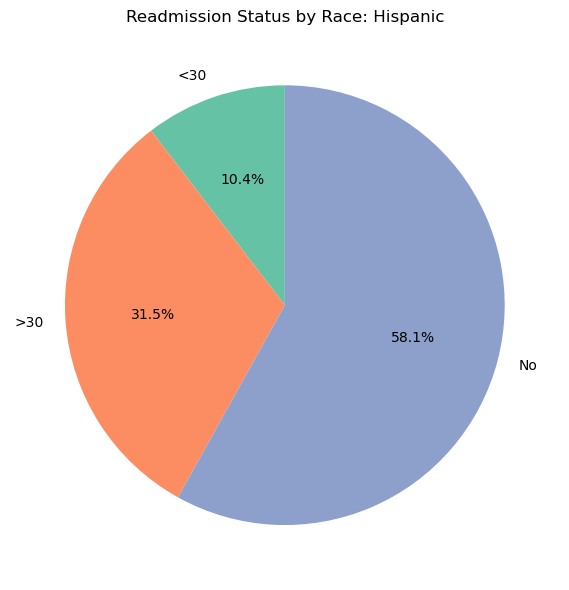

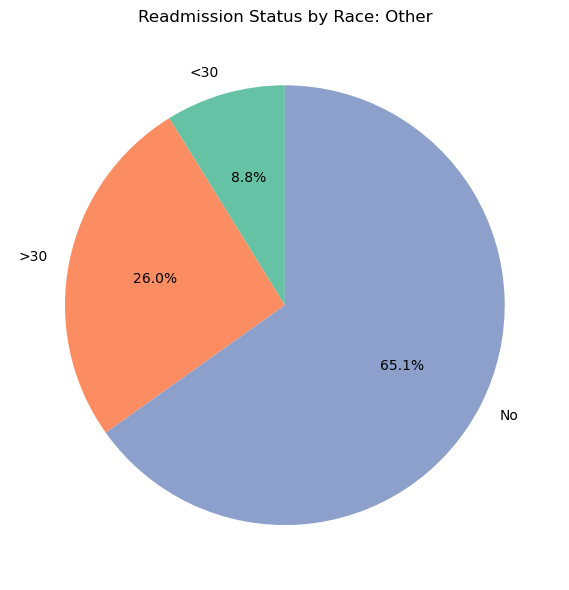

In [26]:
demographics_cols = ['age', 'gender', 'race']
demographics_labels = ['Age', 'Gender', 'Race']

colors = sns.color_palette("Set2")  # consistent colors for categories

for i in range(len(demographics_cols)):
    # Crosstab (absolute counts)
    ct = pd.crosstab(df[demographics_cols[i]], df['readmitted'])

    # Convert to % of total sample
    ct = (ct / ct.values.sum()) * 100

    # Plot one pie chart per demographic value (e.g. Male, Female, each age group)
    for idx, row in ct.iterrows():
        plt.figure(figsize=(6, 6))
        plt.pie(
            row,
            labels=row.index,
            autopct="%.1f%%",
            colors=colors[:len(row.index)],
            startangle=90
        )
        plt.title(f"Readmission Status by {demographics_labels[i]}: {idx}")
        plt.tight_layout()
        plt.show()


In [ ]:
CCI_df = df.iloc[:,[4,21,49]]
# age, number_diagnoses, readmitted
sns.boxplot(data=CCI_df, x='age', y='number_diagnoses', hue='readmitted', palette='Set2')
plt.title("CCI Multivariate Plot: Age vs Number of Diagnoses")
plt.show()

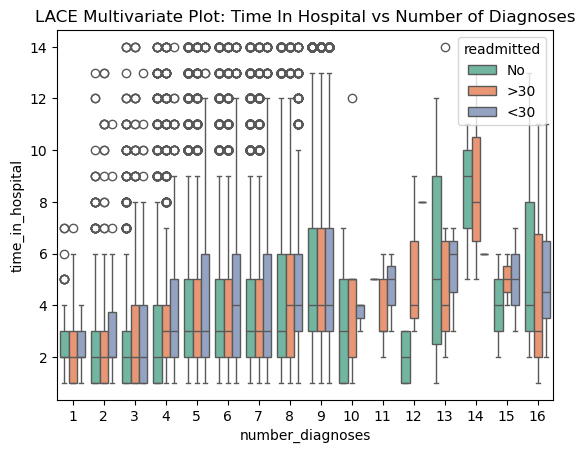

In [59]:
LACE_df = df.iloc[:,[9,6,4,21,16,49]]
# time_in_hospital, admission_type_id, age, number_diagnoses, number_emergency, readmitted
# sns.boxplot(data=LACE_df, x='time_in_hospital', y='admission_type_id', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Time In Hospital vs Admission Type")
# plt.show()

# sns.boxplot(data=LACE_df, x='time_in_hospital', y='age', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Time In Hospital vs Age")
# plt.show()

sns.boxplot(data=LACE_df, y='time_in_hospital', x='number_diagnoses', hue='readmitted', palette='Set2')
plt.title("LACE Multivariate Plot: Time In Hospital vs Number of Diagnoses")
plt.show()

# sns.boxplot(data=LACE_df, x='time_in_hospital', y='number_emergency', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Time In Hospital vs Number of Emergency Visits")
# plt.show()

# sns.boxplot(data=LACE_df, x='admission_type_id', y='age', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Admission Type vs Age")
# plt.show()

# sns.boxplot(data=LACE_df, x='admission_type_id', y='number_diagnoses', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Admission Type vs Number of Diagnoses")
# plt.show()

# sns.boxplot(data=LACE_df, x='admission_type_id', y='number_emergency', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Admission Type vs Number of Emergency Visits")
# plt.show()

# sns.boxplot(data=LACE_df, x='age', y='number_diagnoses', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Age vs Number of Diagnoses")
# plt.show()

# sns.boxplot(data=LACE_df, x='age', y='number_emergency', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Age vs Number of Emergency Visits")
# plt.show()

# sns.boxplot(data=LACE_df, x='number_diagnoses', y='number_emergency', hue='readmitted', palette='Set2')
# plt.title("LACE Multivariate Plot: Number of Diagnoses vs  Number of Emergency Visits")
# plt.show()

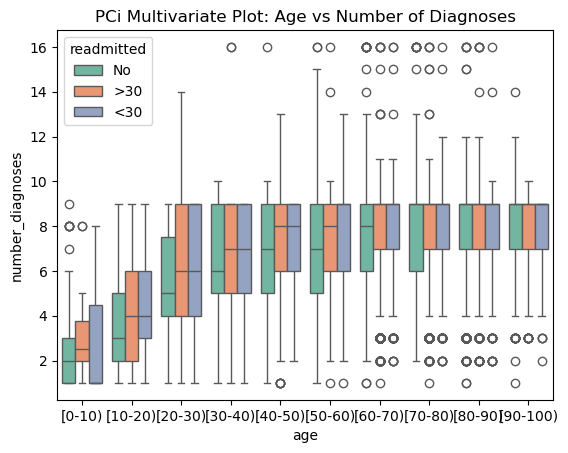

In [60]:
PCi_df = df.iloc[:,[14,4,21,48,49]]
# num_medications, age, number_diagnoses, diabetesMed, readmitted

# sns.boxplot(data=PCi_df, x='num_medications', y='age', hue='readmitted', palette='Set2')
# plt.title("PCi Multivariate Plot: Number of Medications vs Age")
# plt.show()

# sns.boxplot(data=PCi_df, x='num_medications', y='number_diagnoses', hue='readmitted', palette='Set2')
# plt.title("PCi Multivariate Plot: Number of Medications vs Number of Diagnoses")
# plt.show()

# sns.boxplot(data=PCi_df, x='num_medications', y='diabetesMed', hue='readmitted', palette='Set2')
# plt.title("PCi Multivariate Plot: Number of Medications vs Diabetes Med Prescription")
# plt.show()

sns.boxplot(data=PCi_df, x='age', y='number_diagnoses', hue='readmitted', palette='Set2')
plt.title("PCi Multivariate Plot: Age vs Number of Diagnoses")
plt.show()

# sns.boxplot(data=PCi_df, x='age', y='diabetesMed', hue='readmitted', palette='Set2')
# plt.title("PCi Multivariate Plot: Age vs Diabetes Med Prescription")
# plt.show()

# sns.boxplot(data=PCi_df, x='number_diagnoses', y='diabetesMed', hue='readmitted', palette='Set2')
# plt.title("PCi Multivariate Plot: Number of Diagnoses vs Diabetes Med Prescription")
# plt.show()

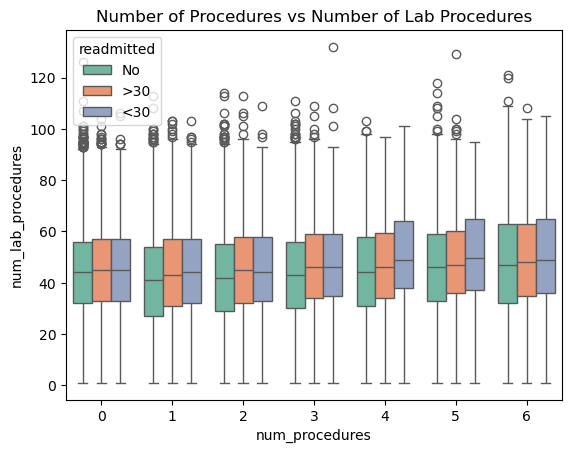

In [62]:
sns.boxplot(data=df, y='num_lab_procedures', x='num_procedures', hue='readmitted', palette='Set2')
plt.title("Number of Procedures vs Number of Lab Procedures")
plt.show()